In [46]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [47]:
from ema_workbench import load_results
from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy, CategoricalParameter, IntegerParameter,
                           perform_experiments, SequentialEvaluator)
from ema_workbench.analysis import prim, dimensional_stacking
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging, utilities
import time

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [48]:
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

dike_model,  planning_steps = get_model_for_problem_formulation(5) #for 17 objectives. 3 x deaths, damage, rfr, total cost and ...

In [49]:
# we do not want any policies to run for the base case

policies = [Policy("base case no policy", **{k.name: 0 for k in dike_model.levers})] 

In [5]:
# EMA workbench experiment runs with 1000 experiments
n_scenarios = 1000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
  0%|                                         | 1/1000 [00:03<51:32,  3.10s/it]Traceback (most recent call last):
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'A.1_Dike Investment Costs 0'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\ema_multiprocessing.py", line 253, in run
    self.callback(*result.get())
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\callbacks.py", line 281, in __call__
    self._store_outcomes(experiment.experiment_id, outcomes)
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\callbacks.py", line 

  1%|▍                                       | 10/1000 [00:04<04:42,  3.50it/s]Traceback (most recent call last):
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'A.5_Dike Investment Costs 1'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\ema_multiprocessing.py", line 253, in run
    self.callback(*result.get())
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\callbacks.py", line 281, in __call__
    self._store_outcomes(experiment.experiment_id, outcomes)
  File "C:\Users\91897\miniconda3\lib\site-packages\ema_workbench\em_framework\callbacks.py", line 260, in _store_outcomes
    self.results[outcome][:] = np.nan
ValueError: cannot convert float NaN to integer
Traceback (most recent call 

In [7]:
#saving the results
utilities.save_results(results, 'results/base_case__17objectives_no_policy.csv')

[MainProcess/INFO] results saved successfully to C:\Users\91897\Desktop\Q4\EPA1361 Model Based Decision Making\Labs\epa1361_open-master\final assignment\results\base_case__17objectives_no_policy.csv


In [50]:
#Load in the results
base_case_results=utilities.load_results('results/base_case__17objectives_no_policy.csv')
experiments, outcomes = base_case_results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)

[MainProcess/INFO] results loaded successfully from C:\Users\91897\Desktop\Q4\EPA1361 Model Based Decision Making\Labs\epa1361_open-master\final assignment\results\base_case__17objectives_no_policy.csv


In [10]:
print("The outcomes are:",outcomes.keys())
experiments.head()

The outcomes are: Index(['A.1_Expected Annual Damage 0', 'A.1_Dike Investment Costs 0',
       'A.1_Expected Number of Deaths 0', 'A.2_Expected Annual Damage 0',
       'A.2_Dike Investment Costs 0', 'A.2_Expected Number of Deaths 0',
       'A.3_Expected Annual Damage 0', 'A.3_Dike Investment Costs 0',
       'A.3_Expected Number of Deaths 0', 'A.4_Expected Annual Damage 0',
       'A.4_Dike Investment Costs 0', 'A.4_Expected Number of Deaths 0',
       'A.5_Expected Annual Damage 0', 'A.5_Dike Investment Costs 0',
       'A.5_Expected Number of Deaths 0', 'RfR Total Costs 0',
       'Expected Evacuation Costs 0', 'A.1_Expected Annual Damage 1',
       'A.1_Dike Investment Costs 1', 'A.1_Expected Number of Deaths 1',
       'A.2_Expected Annual Damage 1', 'A.2_Dike Investment Costs 1',
       'A.2_Expected Number of Deaths 1', 'A.3_Expected Annual Damage 1',
       'A.3_Dike Investment Costs 1', 'A.3_Expected Number of Deaths 1',
       'A.4_Expected Annual Damage 1', 'A.4_Dike Invest

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,69.0,258.008849,10.0,0.190842,256.474052,1.0,0.652463,241.030246,10.0,0.268311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,base case no policy,dikesnet
1,71.0,185.693101,1.5,0.870993,316.301725,10.0,0.784476,76.263781,1.5,0.736706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,base case no policy,dikesnet
2,4.0,100.784780,1.5,0.038337,263.404228,1.5,0.238300,189.993700,10.0,0.984938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,base case no policy,dikesnet
3,36.0,72.212938,10.0,0.541443,304.589973,1.0,0.256022,119.689865,1.0,0.142387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,base case no policy,dikesnet
4,20.0,96.963660,1.5,0.002593,128.581622,1.0,0.374663,160.431140,10.0,0.495633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,base case no policy,dikesnet


In [51]:
outcomes

#we see all outcomes disaggregated over dike rings 

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,8.459982e+08,-1224396560,NaN,NaN,-1142542832,NaN,NaN,1,NaN,NaN,...,1634885968,NaN,NaN,1702390118,NaN,NaN,-1152278480,NaN,NaN,NaN
1,0.000000e+00,0,0.000000,6.051348e+06,274,NaN,NaN,1,NaN,NaN,...,1702126957,NaN,NaN,537538148,NaN,NaN,274,NaN,NaN,NaN
2,5.449897e+08,0,0.533360,1.504057e+07,0,0.020081,0.000000e+00,1,NaN,NaN,...,1936007282,NaN,NaN,169877536,NaN,NaN,-1224235600,NaN,NaN,NaN
3,5.025894e+07,0,0.034456,8.636553e+07,0,0.075830,5.866719e+08,0,0.953904,0.000000e+00,...,1634560372,NaN,NaN,538976288,NaN,NaN,274,NaN,NaN,NaN
4,6.694144e+08,0,0.538060,8.866584e+06,0,0.009895,5.463206e+05,0,0.001175,2.688720e+07,...,544433524,NaN,NaN,1701147206,NaN,NaN,-1233514208,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000e+00,0,0.000000,5.359082e+07,0,0.048436,1.706847e+08,0,0.289703,4.150891e+07,...,0,0.289703,3.306859e+07,0,0.017708,2.758553e+06,0,0.002960,0.0,0.0
996,6.709008e+08,0,0.539553,2.180440e+08,0,0.222352,0.000000e+00,0,0.000000,0.000000e+00,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
997,8.445200e+08,0,0.541459,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,1.529938e+06,...,0,0.000000,1.529938e+06,0,0.000670,0.000000e+00,0,0.000000,0.0,0.0
998,1.673102e+07,0,0.009033,2.524825e+08,0,0.165752,7.162855e+06,0,0.009289,0.000000e+00,...,0,0.009289,0.000000e+00,0,0.000000,2.799873e+08,0,0.222808,0.0,0.0


In [52]:
#join outcomes and experiments into one DataFrame
results = experiments.join(outcomes)
results = results.drop(columns="model")
results

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,69.0,258.008849,10.0,0.190842,256.474052,1.0,0.652463,241.030246,10.0,0.268311,...,1634885968,NaN,NaN,1702390118,NaN,NaN,-1152278480,NaN,NaN,NaN
1,71.0,185.693101,1.5,0.870993,316.301725,10.0,0.784476,76.263781,1.5,0.736706,...,1702126957,NaN,NaN,537538148,NaN,NaN,274,NaN,NaN,NaN
2,4.0,100.784780,1.5,0.038337,263.404228,1.5,0.238300,189.993700,10.0,0.984938,...,1936007282,NaN,NaN,169877536,NaN,NaN,-1224235600,NaN,NaN,NaN
3,36.0,72.212938,10.0,0.541443,304.589973,1.0,0.256022,119.689865,1.0,0.142387,...,1634560372,NaN,NaN,538976288,NaN,NaN,274,NaN,NaN,NaN
4,20.0,96.963660,1.5,0.002593,128.581622,1.0,0.374663,160.431140,10.0,0.495633,...,544433524,NaN,NaN,1701147206,NaN,NaN,-1233514208,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60.0,63.151323,1.5,0.918406,208.863225,1.5,0.352591,139.676141,1.0,0.392020,...,0,0.289703,3.306859e+07,0,0.017708,2.758553e+06,0,0.002960,0.0,0.0
996,71.0,52.031936,10.0,0.167104,247.080345,10.0,0.023670,214.084050,1.0,0.359021,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
997,126.0,177.239020,10.0,0.234076,321.660779,10.0,0.546163,148.646410,1.0,0.834597,...,0,0.000000,1.529938e+06,0,0.000670,0.000000e+00,0,0.000000,0.0,0.0
998,85.0,302.815744,1.5,0.653957,344.886120,10.0,0.149187,111.574399,1.0,0.391427,...,0,0.009289,0.000000e+00,0,0.000000,2.799873e+08,0,0.222808,0.0,0.0


In [53]:
dike_lists = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']

Time step:0, Expected Annual Damage over Dike rings


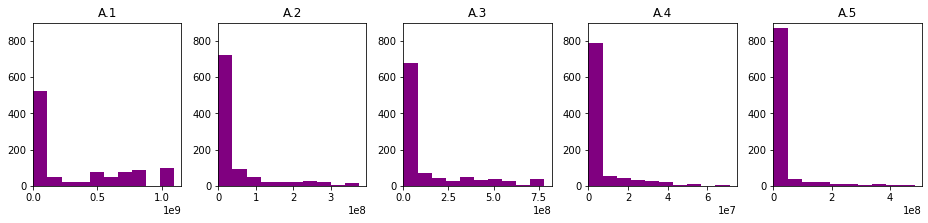

Time step:1, Expected Annual Damage over Dike rings


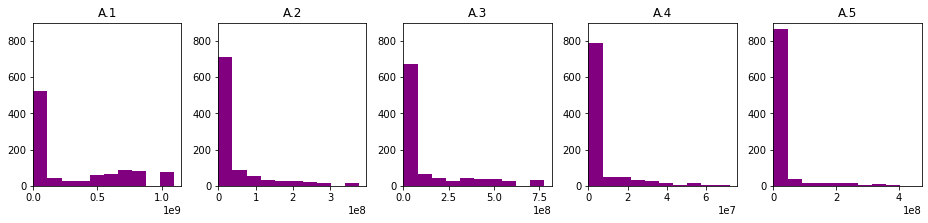

Time step:2, Expected Annual Damage over Dike rings


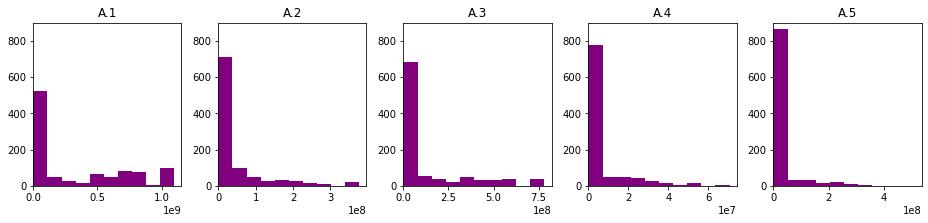

In [61]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(13, 3.2))

    print("Time step:" + str(n) + ", Expected Annual Damage over Dike rings")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Annual Damage "+str(n)] , color = 'purple')
        a.set_xlim(left=0)
        a.set_ylim([0,900])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

Time step:0, Expected Number of Deaths per Dike ring


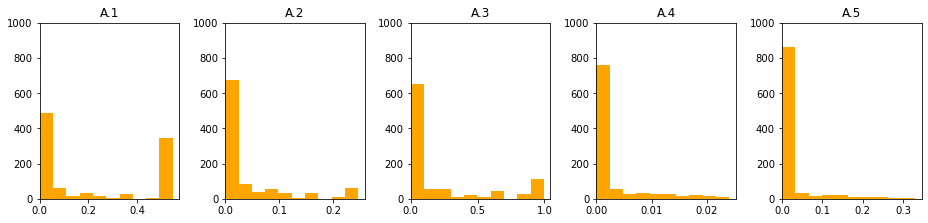

Time step:1, Expected Number of Deaths per Dike ring


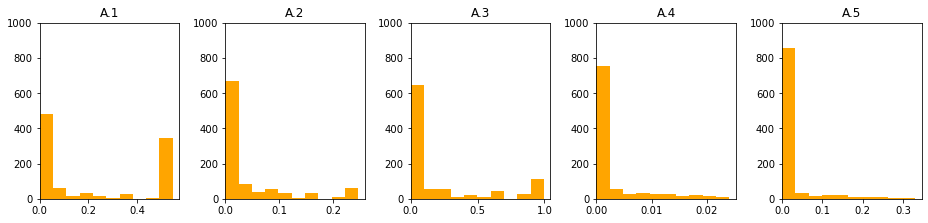

Time step:2, Expected Number of Deaths per Dike ring


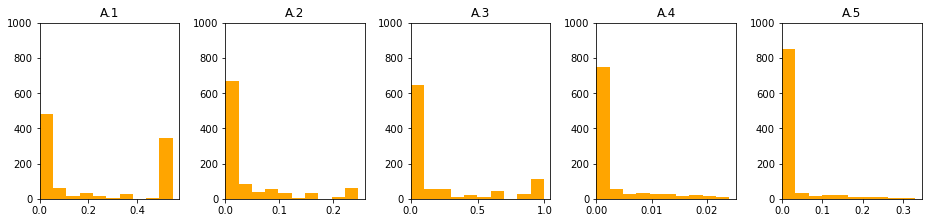

In [55]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(13, 3.2))

    print("Time step:" + str(n) + ", Expected Number of Deaths per Dike ring")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Number of Deaths "+str(n)] , color = 'orange')
        a.set_xlim(left=0)
        a.set_ylim([0,1000])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

## Scenario Discovery

In [56]:
#total demage calculation
damage_column=[]
death_column=[]

for a in results.columns:
    if "Expected Annual Damage" in a:
        damage_column.append(a)

for a in results.columns:
    if "Expected Number of Deaths" in a:
        death_column.append(a)

results["Total Expected Annual Damage"] = results[damage_column].sum(axis=1)
results["Total Expected Number of Deaths"] = results[death_column].sum(axis=1)

total = {'Total Expected Annual Damage': results["Total Expected Annual Damage"], 'Total Expected Number of Deaths': results["Total Expected Number of Deaths"] }
total_results = pd.DataFrame(total)
print(total_results["Total Expected Annual Damage"].mean())
print(total_results["Total Expected Number of Deaths"].mean())

1561279760.6403437
1.4992693402541482


In [57]:
total_damage_75 = results["Total Expected Annual Damage"].quantile(0.75)
total_death_25 = results["Total Expected Number of Deaths"].quantile(0.25)
total_death_25

0.6232195263298067

In [58]:
x = results.iloc[:, :19]  # Only take the uncertainties

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths < total_death_25

[MainProcess/INFO] 1000 points remaining, containing 250 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.163, coverage: 0.652, density: 1.0 restricted_dimensions: 4


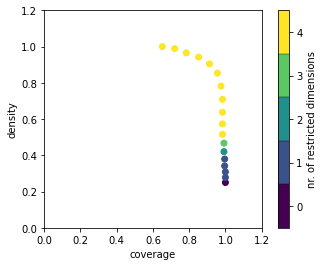

In [38]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [59]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.0,0.25,0,1.0,0.25,0
1,1.0,0.277778,1,0.9,0.277778,1
2,1.0,0.308642,2,0.81,0.308642,1
3,0.996,0.341564,3,0.729,0.341564,1
4,0.996,0.379573,4,0.656,0.379573,1
5,0.992,0.420339,5,0.59,0.420339,2
6,0.992,0.467043,6,0.531,0.467043,3
7,0.984,0.515723,7,0.477,0.515723,4
8,0.984,0.573427,8,0.429,0.573427,4
9,0.984,0.637306,9,0.386,0.637306,4


**Box 13** selected as it is box with highest coverage with density over 90.4%. This means that over 90% of the outcomes that are present in the subspace partition are of interest. And the selected partition covers over 91.2% of the outcomes that are sampled.

coverage       0.912
density     0.904762
id                13
mass           0.252
mean        0.904762
res_dim            4
Name: 13, dtype: object

             box 13                                          
                min       max                       qp values
A.3_pfail  0.413670  0.999981  [4.2062692157166365e-40, -1.0]
A.1_pfail  0.419243  0.999786  [1.6522906042504267e-38, -1.0]
A.5_pfail  0.156583  0.999643  [1.1459334795970332e-06, -1.0]
A.2_pfail  0.090357  0.999190   [0.0038222955801757038, -1.0]



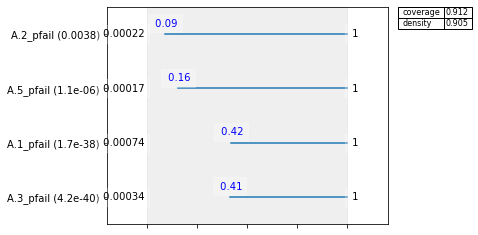

In [60]:
box1.inspect(13)
box1.inspect(style='graph')
plt.show()

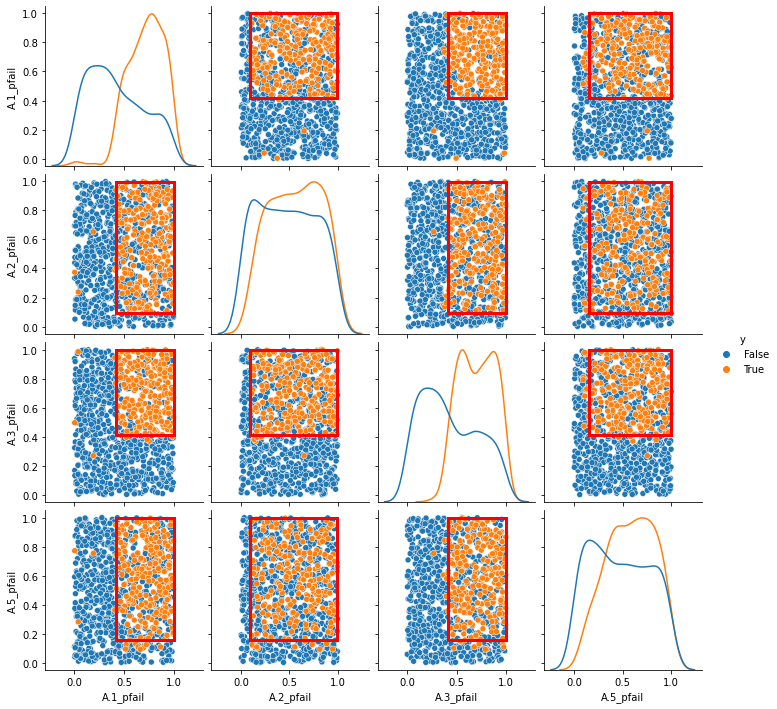

In [41]:
box1.select(13)
box1.show_pairs_scatter()
plt.show()